$\text{Udo Frie, Steffen Beirle, Leonardo Alvarado Bonilla Intercomparison of
MAX-DOAS vertical profile retrieval algorithms: studies using synthetic
data // Atmos. Meas. Tech., 12, 2155–2181, 2019}$

$$\left[ 
\dfrac{mg}{m^3}
\right]
= \underbrace{\text{ppbv} \cdot 1000}_{\text{ppmv}} 
\cdot \dfrac{M}{0.082057338 \cdot T}
\quad M=46005,5\frac{\text{mg}}{\text{mol}}
\quad T=300K$$

In [1]:
import matplotlib.pyplot as plt
import csv
from pathlib import Path

In [2]:
dict_profile_time = {("06", "42"): "PM004A",
                     ("07", "05"): "PM004D",
                     ("07", "37"): "PM005A",
                     ("08", "08"): "PM005D",
                     ("09", "42"): "PM006A",
                     ("10", "13"): "PM006D",
                     ("11", "01"): "PM007A",
                     ("11", "27"): "PM007D",
                     ("13", "06"): "PM008A",
                     ("13", "23"): "PM008D",
                     ("16", "54"): "PM010A",
                     ("17", "17"): "PM010D",
                     ("17", "46"): "PM011A",
                     ("18", "04"): "PM011D"}

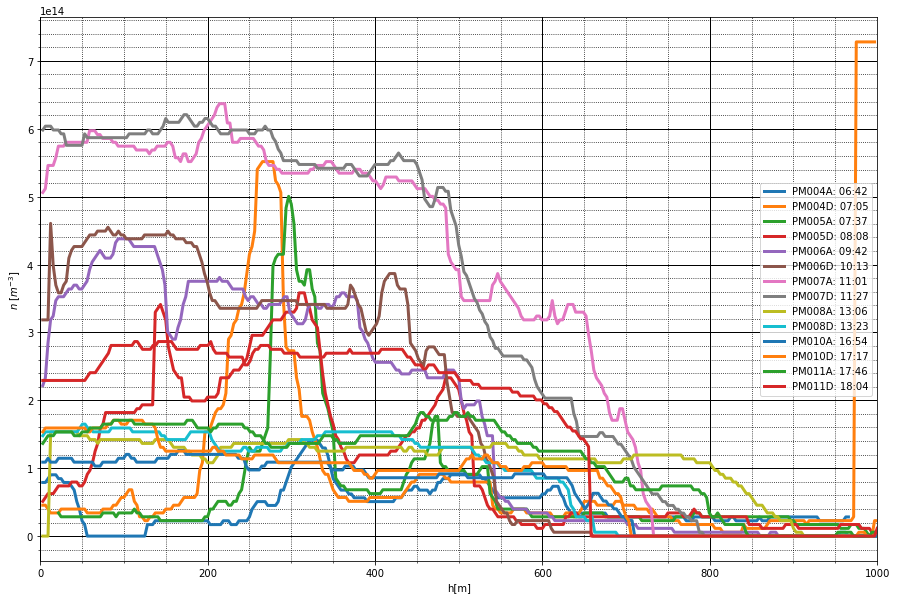

In [3]:
plt.figure(figsize=(15, 10))
for txt_path in sorted(list(Path(Path.cwd().parent, 
                     "data", "profiles_1", 
                     "csv").glob("*.csv"))):
    with open(txt_path, "r") as csv_file:
        reader = csv.reader(csv_file)
        tup_coords: tuple[tuple[str]] = tuple(reader)
        plt.minorticks_on()
        plt.grid(which='major', color = 'k', linewidth = 1)
        plt.grid(which='minor', color = 'k', linestyle = ':')
        plt.xlim(0, 1000)
        #plt.ylim(0, 6*10**7)
        plt.xlabel("h[m]")
        plt.ylabel(r"$n$ [$m^{-3}$]")
        #plt.title(txt_path.name.replace(".csv", "").replace("_", " "))
        list_text = txt_path.name.replace(".csv", "").split("_")
        plt.plot(tuple(float(x[0]) for x in tup_coords), 
                 tuple(float(x[1]) for x in tup_coords),
                 linewidth=3,
                 label=f"{dict_profile_time.get(tuple(list_text[1:]))}: {list_text[1]}:{list_text[2]}")

plt.legend()
plt.show()

In [4]:
for txt_path in sorted(list(Path(Path.cwd().parent, 
                     "data", "profiles_1", 
                     "csv").glob("*.csv"))):
    sum: float = 0
    list_text = txt_path.name.replace(".csv", "").split("_")
    with open(txt_path, "r") as csv_file:
        reader = csv.reader(csv_file)
        tup_coords: tuple[tuple[str]] = tuple(reader)
        for i in range(len(tup_coords)-1):
            sum += ((float(tup_coords[i][0])-float(tup_coords[i+1][0])) * 
                     float(tup_coords[i+1][1]) + float(tup_coords[i][1]) / 2)
        print(f"{dict_profile_time.get(tuple(list_text[1:]))}: {list_text[1]}:{list_text[2]} integral = {sum}")               

PM004A: 06:42 integral = 5.003363302406587e+16
PM004D: 07:05 integral = 1.1069808759252742e+17
PM005A: 07:37 integral = 7.844701584178586e+16
PM005D: 08:08 integral = 1.3066137802178918e+17
PM006A: 09:42 integral = 2.1076769262388317e+17
PM006D: 10:13 integral = 2.2047574844763952e+17
PM007A: 11:01 integral = 3.946418971584323e+17
PM007D: 11:27 integral = 3.8873749230813216e+17
PM008A: 13:06 integral = 1.241488894660428e+17
PM008D: 13:23 integral = 1.0016769596053443e+17
PM010A: 16:54 integral = 7.864449142739789e+16
PM010D: 17:17 integral = 9.46439964393324e+16
PM011A: 17:46 integral = 1.2971091886139322e+17
PM011D: 18:04 integral = 1.8843065036273258e+17
